In [14]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys



sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f


pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

In [15]:
df_encoded=pd.read_csv("..\..\..\datos\datos0\datos_clusterizados0_escalado.csv", index_col=0)

In [16]:
df_encoded.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_robust,Country_robust,Category_robust,Sub-Category_robust,Discount_robust
0,544.75,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.79,0.97,1.11,1.19,0.00
1,525.91,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.11,-0.14,1.11,1.19,0.00
2,520.49,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.91,0.97,1.11,1.19,0.00
3,534.17,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.90,0.00,1.62,0.00
4,280.87,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.14,-0.06,1.00,2.29,0.25


In [17]:
x= df_encoded.drop(columns="Sales_unitario")
y= df_encoded[["Sales_unitario"]]

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (modelo 2)

    max_depth=6,
    max_leaf_nodes=100,
    min_samples_leaf=60,
    min_samples_split=5

In [22]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [20,35,45,100],    #número de árboles que queremos que haga
    'max_features': [10,15,20,25],
    'max_depth': [6,7,8],
    'min_samples_split': [30,40,45,100,120],
    'min_samples_leaf': [4,6,7,8], 
    'max_leaf_nodes': [8,90,100,120]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["Sales_unitario"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=25, max_leaf_nodes=90,
                      min_samples_leaf=4, min_samples_split=100,
                      n_estimators=20, random_state=42)

In [23]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [24]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.51,37.91,"4,868.45",69.77
test,0.49,39.28,"5,136.30",71.67


PRUEBA de modelo con otros parametros



In [19]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [20,35,45,100],    #número de árboles que queremos que haga
    'max_features': [20,25,30],
    'max_depth': [6,7,8],
    'min_samples_split': [40,45,100, 120],
    'min_samples_leaf': [6,7,8], 
    'max_leaf_nodes': [8,10,100,120]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["Sales_unitario"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=20, max_leaf_nodes=100,
                      min_samples_leaf=6, min_samples_split=40,
                      random_state=42)

In [20]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [21]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.53,37.41,"4,719.75",68.70
test,0.50,39.10,"5,066.38",71.18


### De estos 2 modelos de Random Forest me quedo con el modelo 2 porque aunque cuenta con un poco más de over fitting (nada exagerado), creo que merece la pena por las mejoras tanto en mayor r cuadrado como en menores errores (Lo he probado con 0,7 y con 0,8 y me da el mejor resultado el 0,7)

In [27]:
df_importancia=pd.DataFrame(modelo_final_rf.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia.head(7)

,Importancia
Sub-Category_robust,0.67
Category_robust,0.13
City_robust,0.07
Country_robust,0.06
Discount_robust,0.04
Order Priority_Critical,0.01
Quantity_entre 1 y 2,0.00


<Axes: xlabel='Importancia', ylabel='None'>

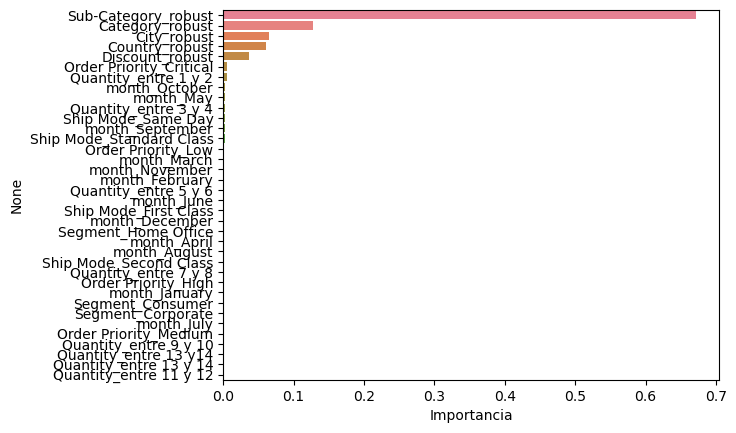

In [26]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo  
## Conclusión:  
- Para la predicción de los ingresos unitarios usando los datos de clientes 0, las variables más determinantes son las Sub-categorías y Categorías del producto, la ciudad y el país y por último los descuentos.